In [14]:
from Xgb import XGB
from NaiveBayes import NaiveBayes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

df = pd.read_csv('./data/StressLevelDataset.csv')


In [15]:
from sklearn.metrics import roc_curve, auc 
def acu_curve(y,prob):
    #  y真实,
    #  prob预测
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真阳性率(真正率)和假阳性率(假正率)
    roc_auc = auc(fpr,tpr) ###计算auc的值
 
    plt.figure()
    lw = 2
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.4f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC')
    plt.legend(loc="lower right")
 
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=114)
X_train = train_set[[x for x in df.columns if x!='stress_level']]
y_train = train_set['stress_level']
X_test = test_set[[x for x in df.columns if x!='stress_level']]
y_test = test_set['stress_level']

In [17]:
y_train = pd.get_dummies(y_train)

In [18]:
xgb_res = pd.DataFrame()
for i in range(y_train.shape[1]):
    xgb = XGB(n_estimators=2, max_depth=2, reg_lambda=1, min_child_weight=1, objective='logistic')
    xgb.fit(X_train,y_train.loc[:,i])
    xgb_res = pd.concat([xgb_res, xgb.predict_prob(X_test).rename(str(i))],axis=1)

fitting tree 1...
tree 1 fit done!
fitting tree 2...
tree 2 fit done!
{1: {('teacher_student_relationship', 4): {('left', -2.274408013855769): {('teacher_student_relationship', 1): {('left', -0.4157749507140304): None, ('right', -2.389084255024725): None}}, ('right', 1.3102765171424364): {('blood_pressure', 3): {('left', 1.578311693822172): None, ('right', -1.0998372668516325): None}}}}, 2: {('basic_needs', 4): {('left', -2.049064608562224): {('bullying', 2): {('left', -0.6901907861421226): None, ('right', -2.155199289631982): None}}, ('right', 1.0433079237539902): {('blood_pressure', 3): {('left', 1.490120936268755): None, ('right', -0.6381015271262436): None}}}}}
fitting tree 1...
tree 1 fit done!
fitting tree 2...
tree 2 fit done!
{1: {('blood_pressure', 2): {('left', 1.5788823382406454): None, ('right', -2.2927182218922): {('social_support', 1): {('left', -0.9277724658582727): None, ('right', -2.463819467830228): None}}}}, 2: {('blood_pressure', 2): {('left', 1.4906542202563975): N

In [19]:
bayes_res = []
for i in range(y_train.shape[1]):
    bys = NaiveBayes(X_train,y_train.loc[:,i])
    bayes_res.append(bys.predict(X_test))

In [20]:
xgb_res

,0,1,2
0,0.511391,0.691460,0.503136
1,0.511391,0.691460,0.503136
2,0.511391,0.580528,0.685674
3,0.691436,0.510538,0.503136
4,0.511391,0.691460,0.503136
...,...,...,...
215,0.511391,0.510538,0.685674
216,0.691436,0.510538,0.503136
217,0.511391,0.691460,0.503136
218,0.511391,0.691460,0.503136


In [21]:
np.argmax(np.array(xgb_res),axis=1)
np.array(y_test)

array([1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2,
       1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2],
      dtype=int64)

In [22]:
np.array(bayes_res).T.shape

(220, 3)

In [23]:
confusion_matrix(np.array(y_test), np.argmax(np.array(xgb_res),axis=1))

array([[63,  3,  9],
       [ 2, 61,  1],
       [ 3,  1, 77]], dtype=int64)

In [24]:
confusion_matrix(np.array(y_test), np.argmax(np.array(bayes_res).T,axis=1))

array([[69,  0,  6],
       [ 6, 58,  0],
       [ 6,  2, 73]], dtype=int64)

<Figure size 640x480 with 0 Axes>

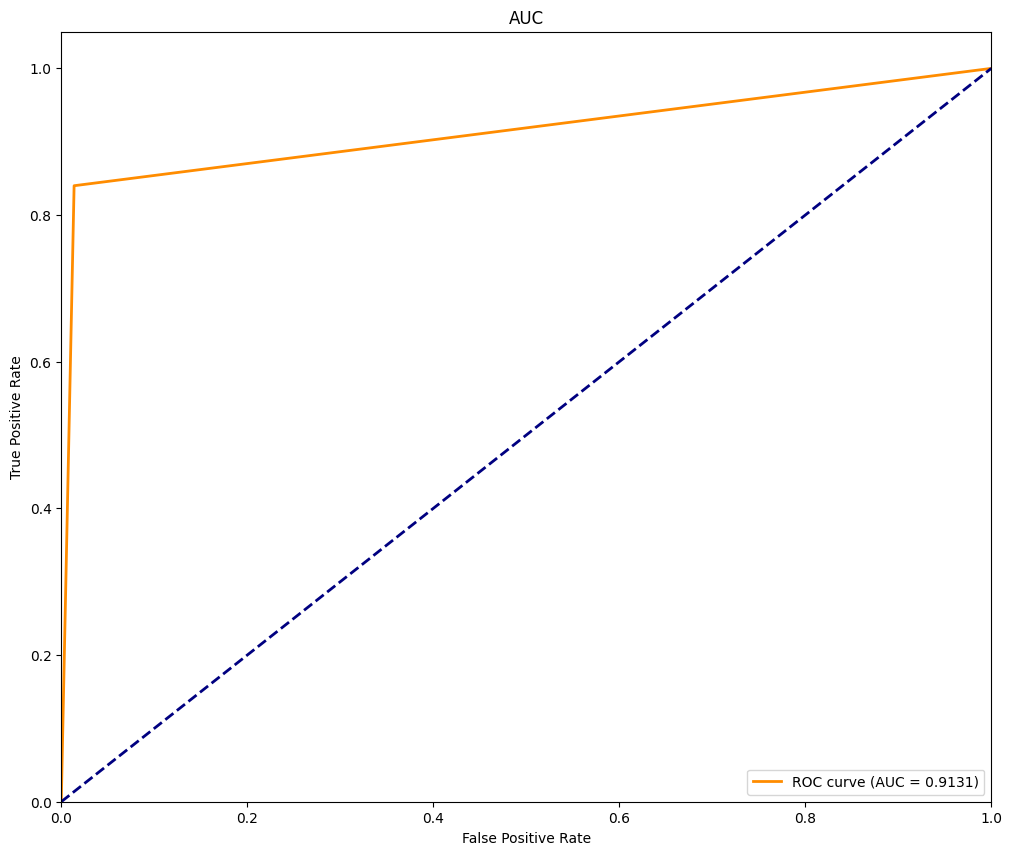

<Figure size 640x480 with 0 Axes>

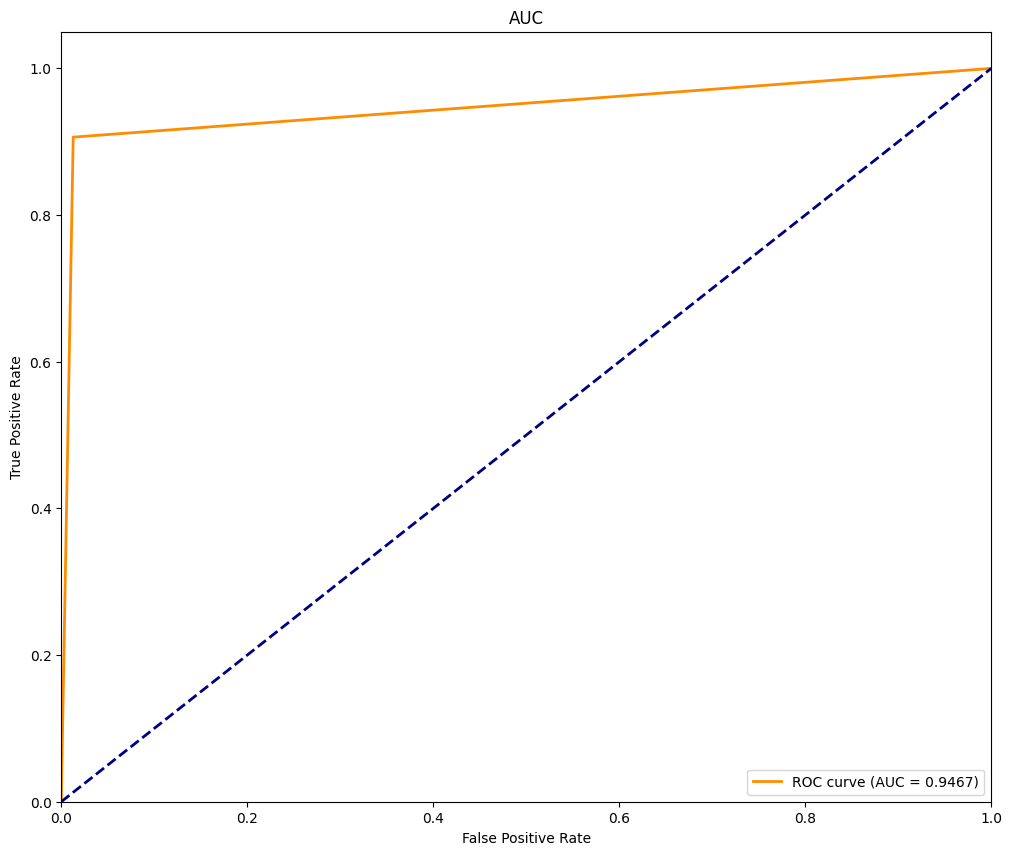

<Figure size 640x480 with 0 Axes>

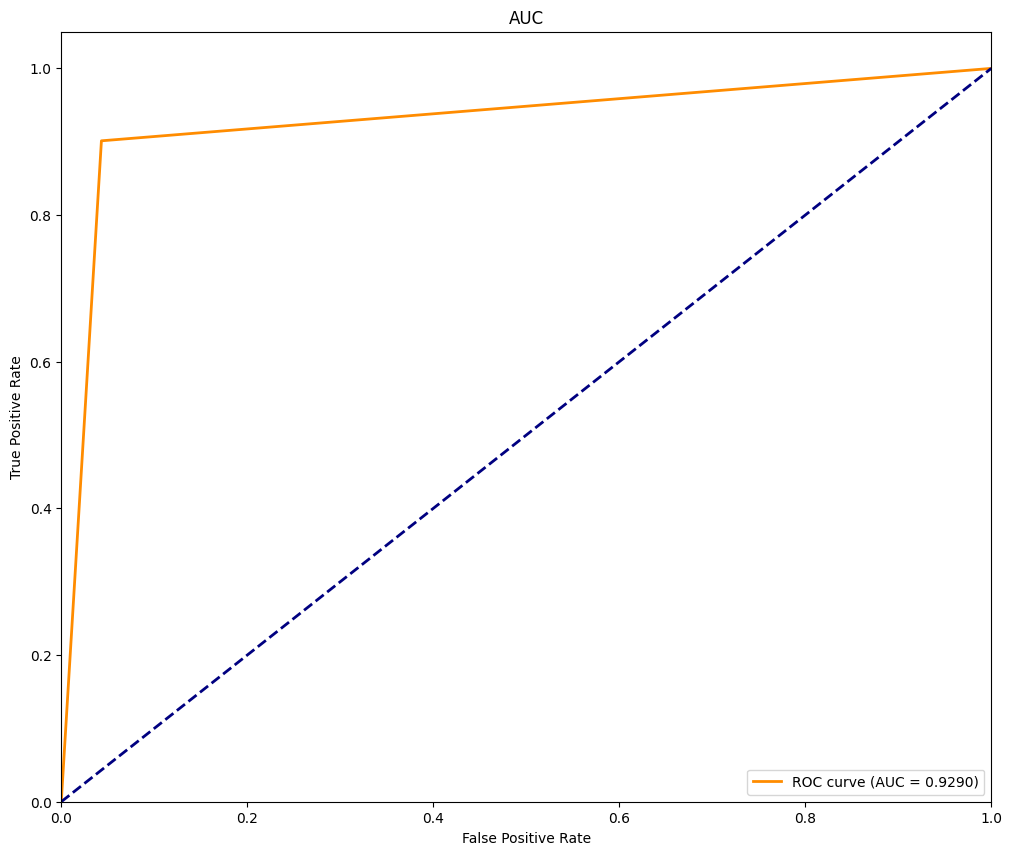

In [25]:
for i in range(y_train.shape[1]):
    acu_curve(pd.get_dummies(y_test).loc[:,i], bayes_res[i])

<Figure size 640x480 with 0 Axes>

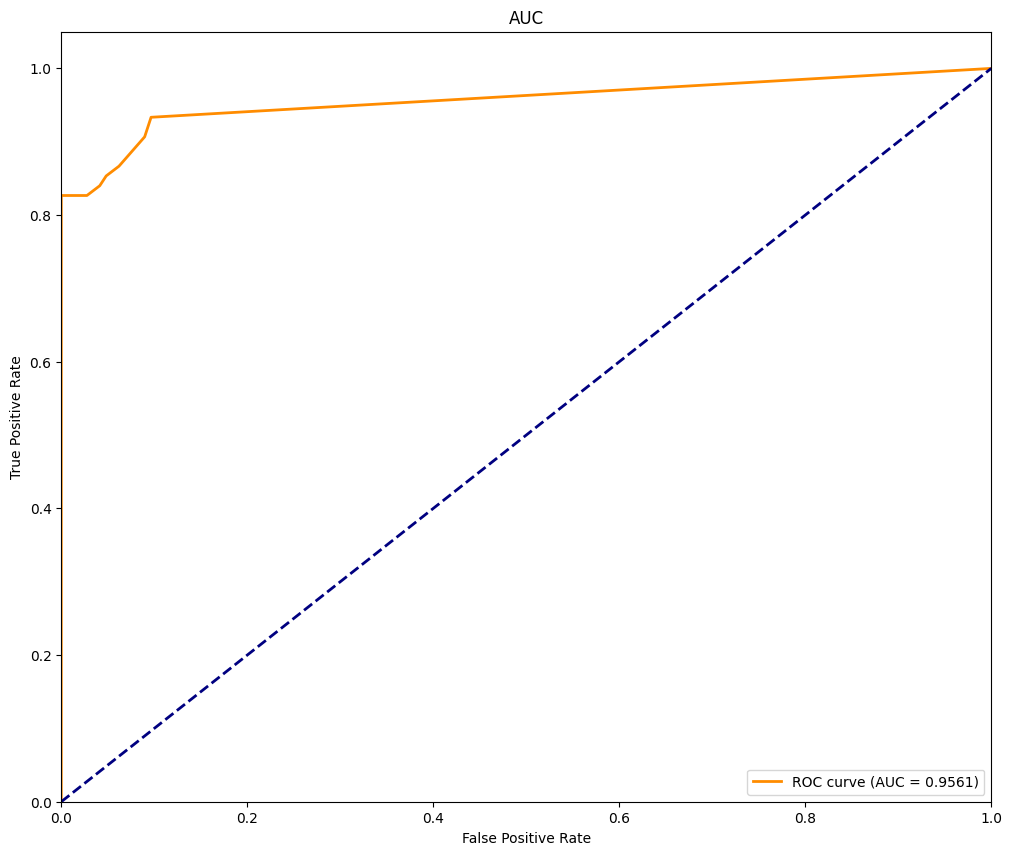

<Figure size 640x480 with 0 Axes>

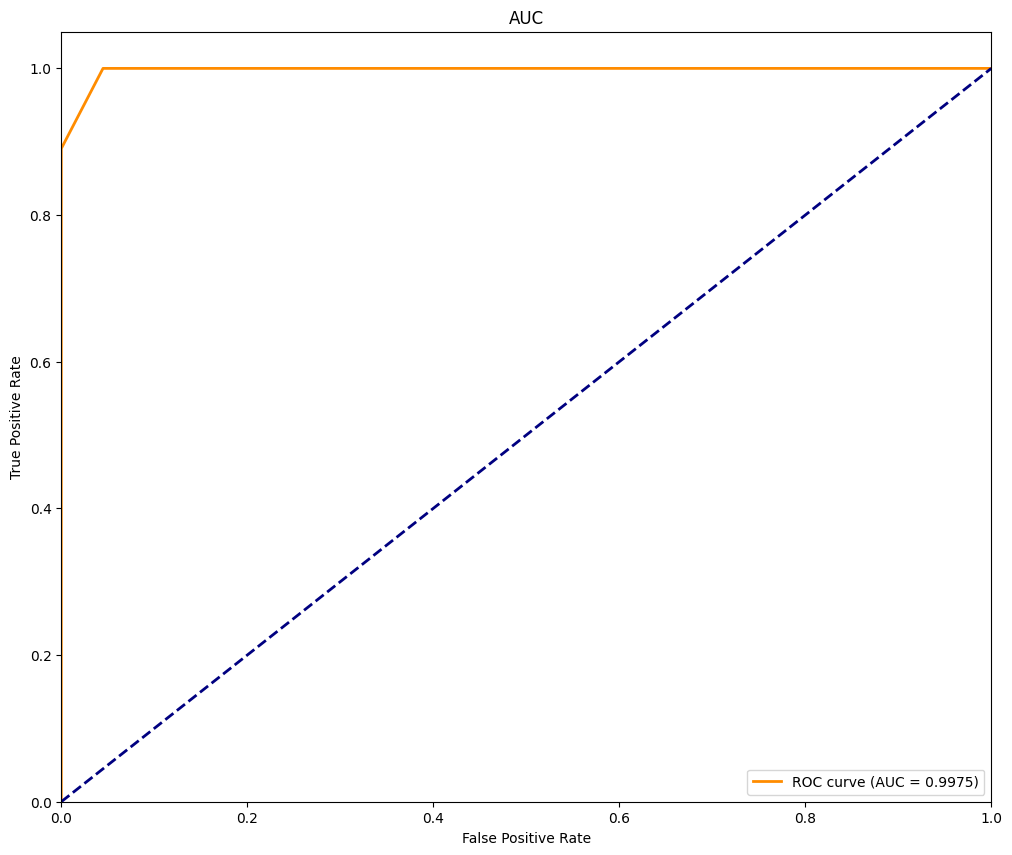

<Figure size 640x480 with 0 Axes>

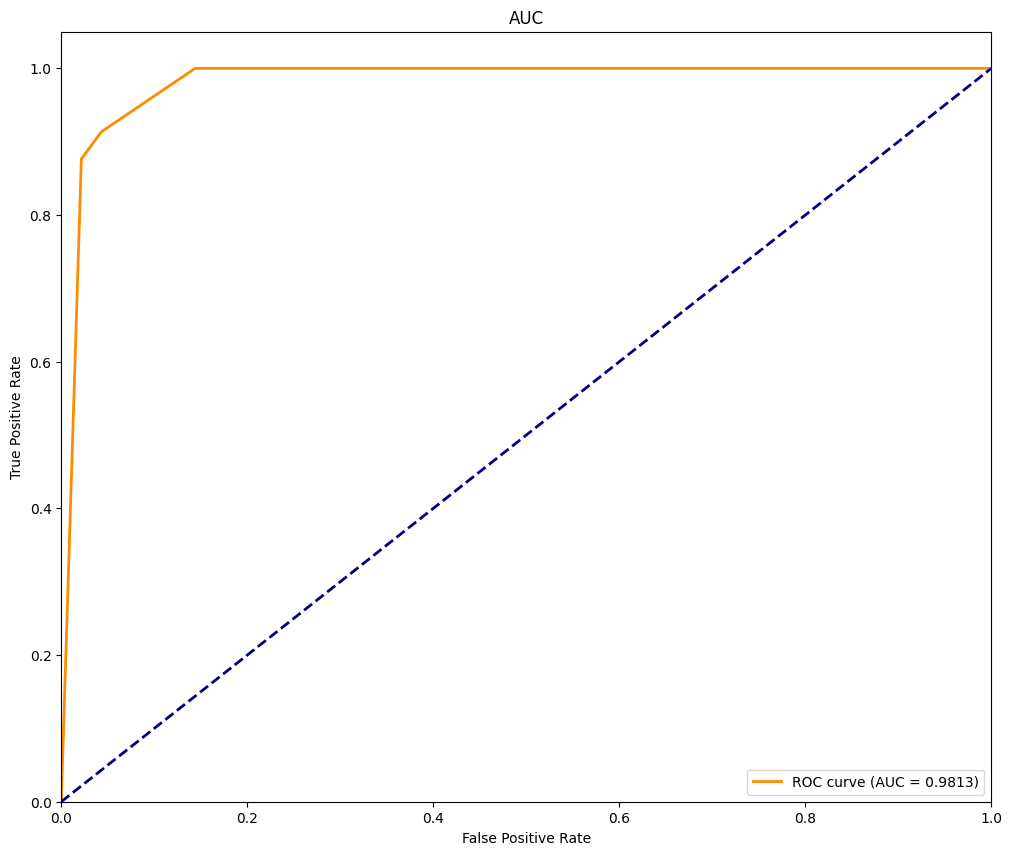

In [26]:
for i in range(y_train.shape[1]):
    acu_curve(pd.get_dummies(y_test).loc[:,i], np.array(xgb_res)[:,i])